In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import seaborn as sns

adaECOLog
OFULogPlus
OFULog-r


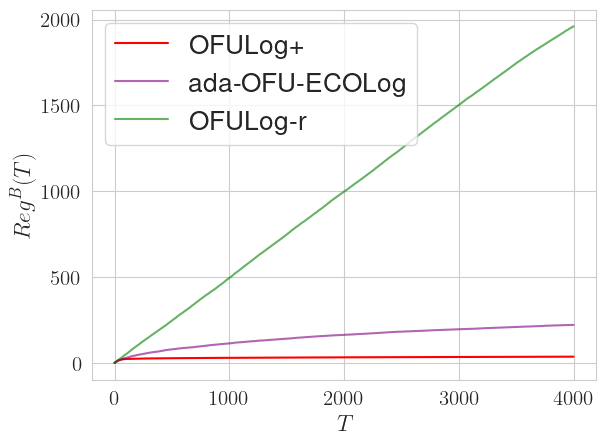

In [3]:
d = 2
param_norm = 9
H = 4000
arm_set_type = 'tv_discrete'

# path to logs/
logs_dir = f'logs/{arm_set_type}_h_{H}'

# accumulate results
res_dict = dict()
for log_path in os.listdir(logs_dir):
    with open(os.path.join(logs_dir, log_path), 'r') as data:
        log_dict = json.load(data)
        # log_dict = json.load(open(os.path.join(logs_dir, log_path), 'r'))
        log_cum_regret = np.array(log_dict["cum_regret"])
    
        # eliminate logs with undesired dimension
        dim = int(log_dict["dim"])
        if not dim == d:
            continue
        # eliminate logs with undesired param norm
        pn = int(log_dict["norm_theta_star"])
        if not pn == param_norm:
            continue
    
        algo = log_dict["algo_name"]
        print(algo)
        res_dict[algo] = log_cum_regret

# plotting
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.size": 17})

alphas = [1, 0.6, 0.6]
alg_dict = {"OFULogPlus": "OFULog+", "adaECOLog": "ada-OFU-ECOLog", "OFULog-r": "OFULog-r"}
colors = ['red', 'purple', 'green']
clrs = sns.color_palette("husl", 4)

with sns.axes_style("whitegrid"):
    for i, algorithm in enumerate(["OFULogPlus", "adaECOLog", "OFULog-r"]):
        alg_name = alg_dict[algorithm]
        plt.plot(res_dict[algorithm], label=alg_name, color=colors[i], alpha=alphas[i])

plt.legend(loc='upper left', prop={'size': 19})
plt.xlabel(r"$T$")
plt.ylabel(r"$Reg^B(T)$")
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.savefig(f"logs/regret_S={param_norm+1}_h={H}.pdf", dpi=300)
plt.savefig(f"logs/regret_S={param_norm+1}_h={H}.png", dpi=300)
plt.show()